# Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan?

# The "loan_status" column contains our label.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('C:/Users/deven/PYTHON STUFF/DATA/lending_club_loan_two.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [4]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [5]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


<AxesSubplot:xlabel='loan_status', ylabel='count'>

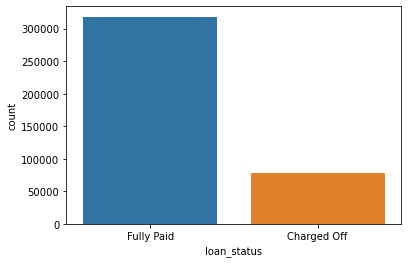

In [6]:
sns.countplot(x='loan_status',data=df)

<AxesSubplot:xlabel='grade', ylabel='count'>

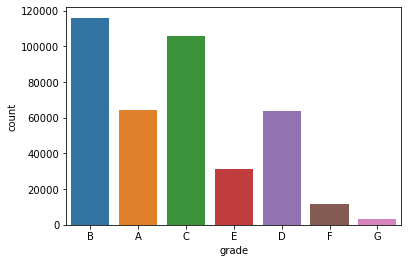

In [7]:
sns.countplot(x='grade',data=df)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

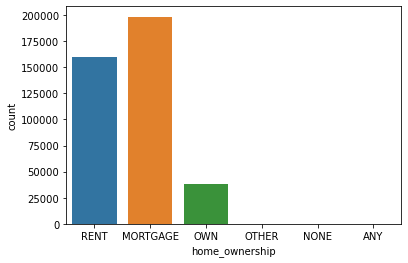

In [8]:
sns.countplot(x='home_ownership',data=df)

In [9]:
plt.figure(figsize=(12,8))
#df.plot()

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

C:\Users\deven\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt'>

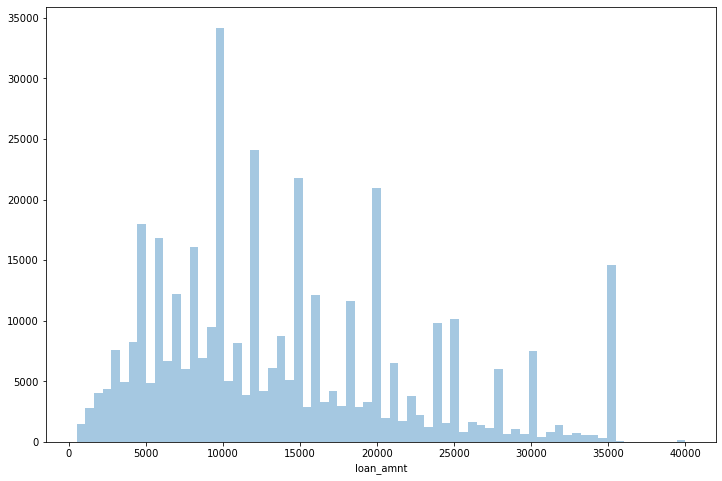

In [10]:
plt.figure(figsize=(12,8))
sns.distplot(df['loan_amnt'],kde=False,bins=70)

In [11]:
df.count()

loan_amnt               396030
term                    396030
int_rate                396030
installment             396030
grade                   396030
sub_grade               396030
emp_title               373103
emp_length              377729
home_ownership          396030
annual_inc              396030
verification_status     396030
issue_d                 396030
loan_status             396030
purpose                 396030
title                   394275
dti                     396030
earliest_cr_line        396030
open_acc                396030
pub_rec                 396030
revol_bal               396030
revol_util              395754
total_acc               396030
initial_list_status     396030
application_type        396030
mort_acc                358235
pub_rec_bankruptcies    395495
address                 396030
dtype: int64

###    Relationship between loan amount and loan status

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

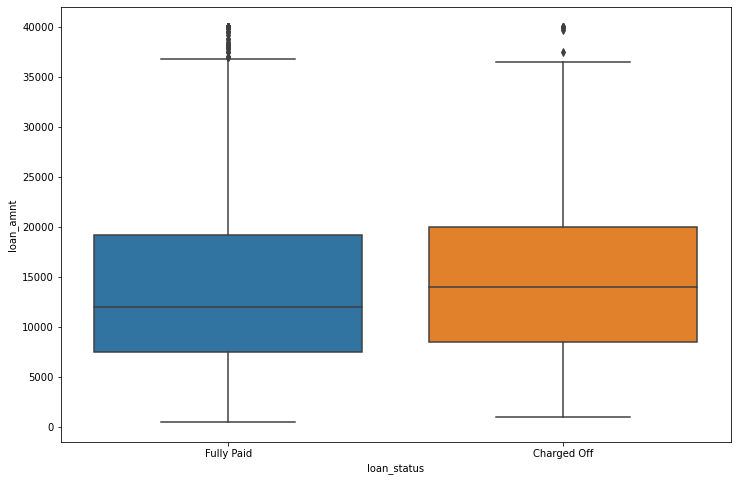

In [12]:

plt.figure(figsize=(12,8))
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

### Exploring grade and sub grade column 

In [13]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [14]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

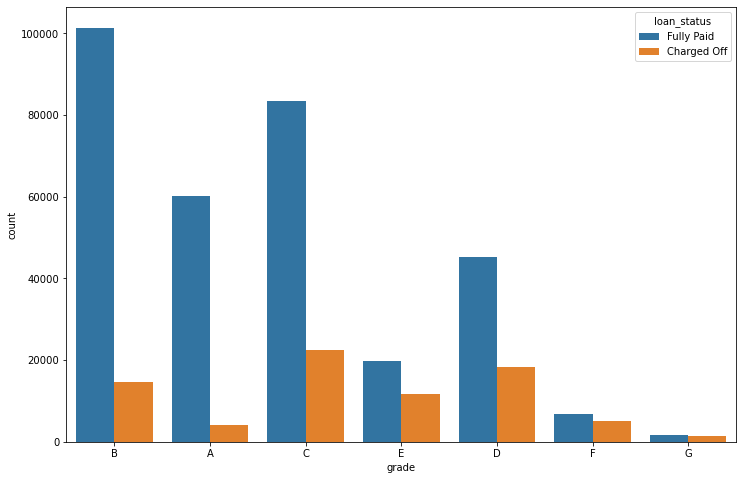

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(x='grade',data=df,hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

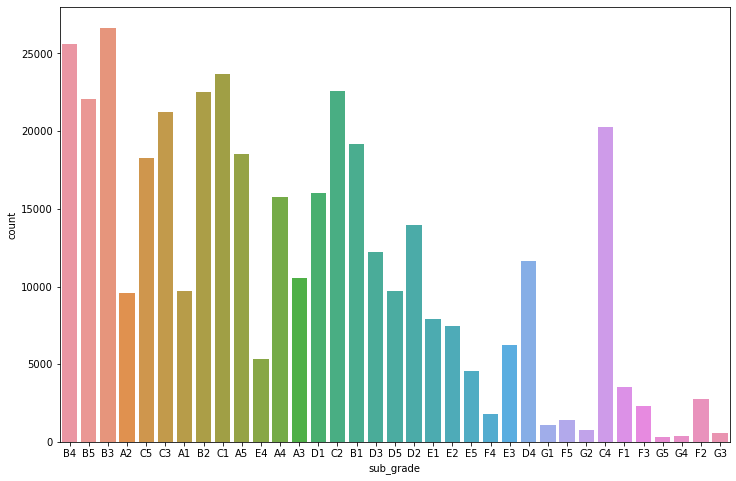

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(x='sub_grade',data=df)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

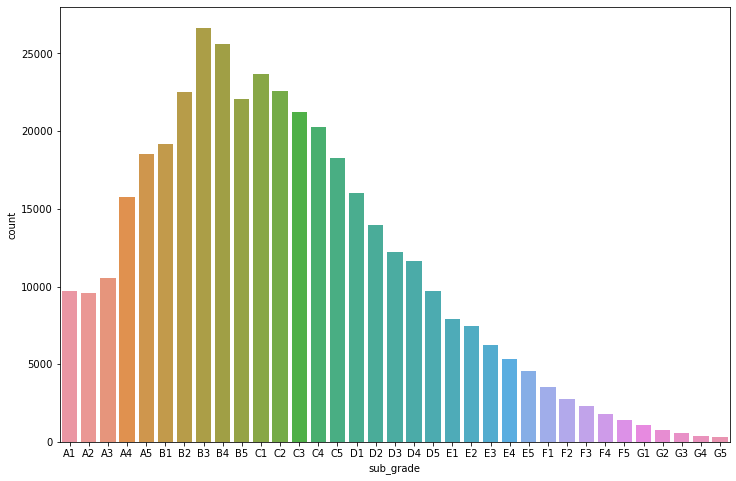

In [17]:
#reodering 

re_order=sorted(df['sub_grade'].unique())

plt.figure(figsize=(12,8))
sns.countplot(x='sub_grade',data=df,order=re_order)



In [18]:
# so OUR MAXIMUM NO. OF CUSTOMER BELONGS TO B AND C GRADE

In [19]:
F_G=df[(df['grade']=='G' ) | (df['grade']=='F')]

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

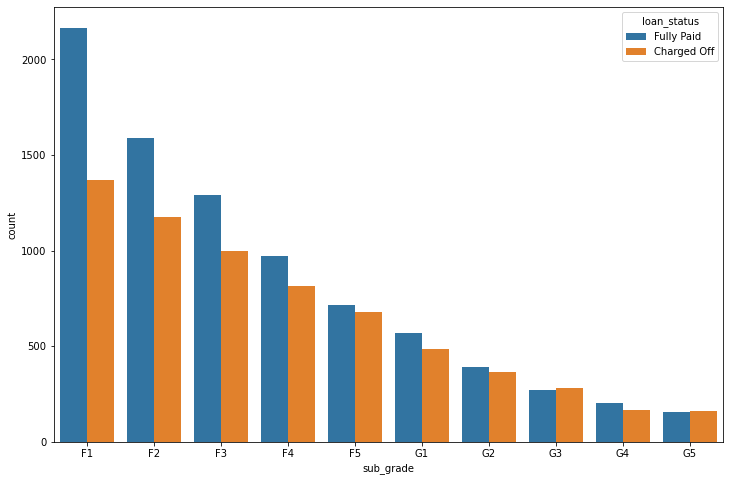

In [20]:
re_order=sorted(F_G['sub_grade'].unique())

plt.figure(figsize=(12,8))
sns.countplot(x='sub_grade',data=F_G,order=re_order,hue='loan_status')


In [21]:
# SO IF CUSTOMER BELONGS TO G5 SUBGRADE THEN THEIR IS HIGH CHANCE THAT HE WILL NOT PAY THE LOAN

### CREATE A NEW COLUMN NAMED LOAN_STATUS1 WHICH WLL CONTAIN 0 IF LOAN IS NOT PAID AND 1 IF LOAN IS PAID


In [22]:
df['loan_status1']= df['loan_status'].map({'Fully Paid':1,'Charged Off' :0})

In [23]:
df[['loan_status1','loan_status']]

,loan_status1,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


### Handling missing values

In [24]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_status1                0
dtype: int64

In [25]:
#how much percentage of data is missing

100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_status1            0.000000
dtype: float64

In [26]:
# MOST OF THE DATA IS MISSING FROM mort_acc, emp_title, emp_length

In [27]:
df['emp_title'].unique().shape

(173106,)

In [28]:
len(df)

396030

In [29]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [30]:
df=df.drop('emp_title',axis=1)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

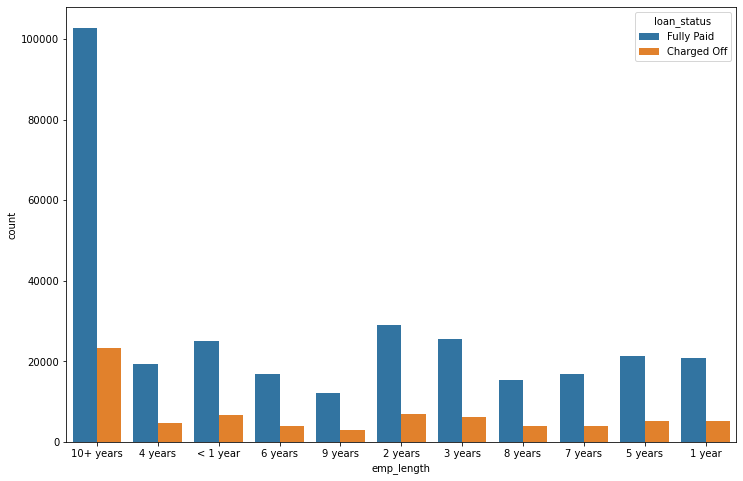

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(x='emp_length',data=df,hue='loan_status')

In [32]:
# IT SEEMS LIKE THEIR IS NO RELATIONSHIP BETWEEN emp_length and loan_status

# that means we cannot say that if a person has spent less time in job that doesn't mean he will not been able to pay loan

In [33]:
df=df.drop('emp_length',axis=1)

In [34]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_status1'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   issue_d               396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  title                 394275 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

In [36]:
df['title'].nunique()

48817

In [37]:
len(df)

396030

In [38]:
48817/396030

0.12326591419841931

In [39]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [40]:
df['purpose'].nunique()

14

In [41]:
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

In [42]:
# difficult to manage 48000 text data so we will drop title

In [43]:
df=df.drop('title', axis=1)

<AxesSubplot:xlabel='purpose', ylabel='count'>

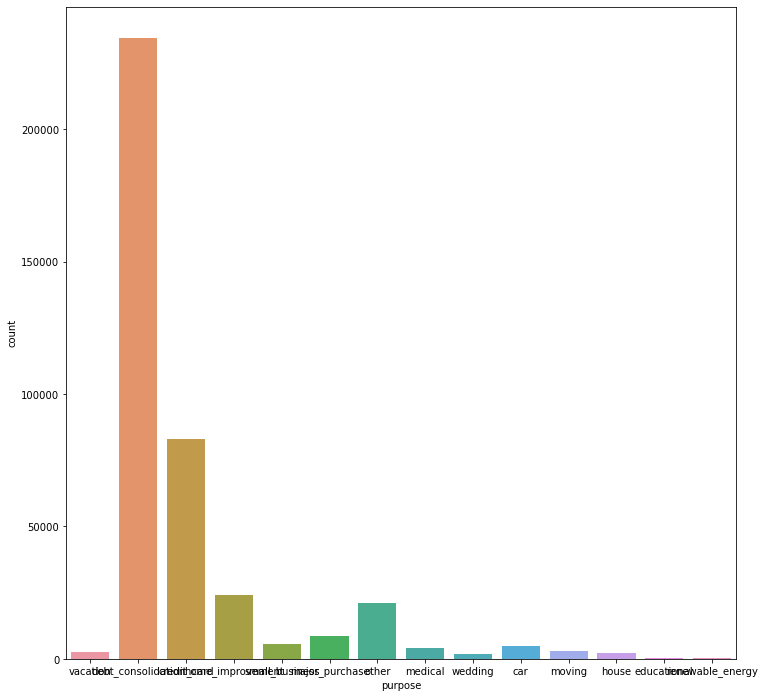

In [44]:
plt.figure(figsize=(12,12))
sns.countplot(x='purpose',data=df)

In [45]:
df.groupby('purpose').count()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status1
purpose,,,,,,,,,,,,,,,,,,,,,
car,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,...,4697,4697,4687,4697,4697,4697,3288,4680,4697,4697
credit_card,83019,83019,83019,83019,83019,83019,83019,83019,83019,83019,...,83019,83019,82999,83019,83019,83019,77699,82943,83019,83019
debt_consolidation,234507,234507,234507,234507,234507,234507,234507,234507,234507,234507,...,234507,234507,234384,234507,234507,234507,216474,234292,234507,234507
educational,257,257,257,257,257,257,257,257,257,257,...,257,257,255,257,257,257,1,248,257,257
home_improvement,24030,24030,24030,24030,24030,24030,24030,24030,24030,24030,...,24030,24030,23997,24030,24030,24030,21353,23994,24030,24030
house,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,...,2201,2201,2201,2201,2201,2201,1819,2197,2201,2201
major_purchase,8790,8790,8790,8790,8790,8790,8790,8790,8790,8790,...,8790,8790,8769,8790,8790,8790,6853,8777,8790,8790
medical,4196,4196,4196,4196,4196,4196,4196,4196,4196,4196,...,4196,4196,4183,4196,4196,4196,3570,4188,4196,4196
moving,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854,...,2854,2854,2850,2854,2854,2854,2344,2846,2854,2854


In [46]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_status1                0
dtype: int64

In [47]:
# most of the null values are in mort_acc

In [48]:
df.corr()['mort_acc'].sort_values()


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_status1            0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [49]:
# SO total_acc is correlated with mort_acc by 38% (not so highly correlated)

In [50]:
df[['mort_acc','total_acc']]

,mort_acc,total_acc
0,0.0,25.0
1,3.0,27.0
2,0.0,26.0
3,0.0,13.0
4,1.0,43.0
...,...,...
396025,0.0,23.0
396026,1.0,8.0
396027,0.0,23.0
396028,5.0,20.0


In [51]:
df['mort_acc'].mean()

1.8139908160844138

In [52]:
df['total_acc'].unique()

array([ 25.,  27.,  26.,  13.,  43.,  23.,  15.,  40.,  37.,  61.,  35.,
        22.,  20.,  36.,  38.,   7.,  18.,  10.,  17.,  29.,  16.,  21.,
        34.,   9.,  14.,  59.,  41.,  19.,  12.,  30.,  56.,  24.,  28.,
         8.,  52.,  31.,  44.,  39.,  50.,  11.,  62.,  32.,   5.,  33.,
        46.,  42.,   6.,  49.,  45.,  57.,  48.,  67.,  47.,  51.,  58.,
         3.,  55.,  63.,  53.,   4.,  71.,  69.,  54.,  64.,  81.,  72.,
        60.,  68.,  65.,  73.,  78.,  84.,   2.,  76.,  75.,  79.,  87.,
        77., 104.,  89.,  70., 105.,  97.,  66., 108.,  74.,  80.,  82.,
        91.,  93., 106.,  90.,  85.,  88.,  83., 111.,  86., 101., 135.,
        92.,  94.,  95.,  99., 102., 129., 110., 124., 151., 107., 118.,
       150., 115., 117.,  96.,  98., 100., 116., 103.])

In [53]:
df['mort_acc'].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [54]:
df.groupby('total_acc').mean()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,loan_status1
total_acc,,,,,,,,,,,,
2.0,6672.222222,15.801111,210.881667,64277.777778,2.279444,1.611111,0.000000,2860.166667,53.527778,0.000000,0.000000,0.777778
3.0,6042.966361,15.615566,198.728318,41270.753884,6.502813,2.611621,0.045872,3382.807339,49.991022,0.052023,0.015480,0.779817
4.0,7587.399031,15.069491,250.050194,42426.565969,8.411963,3.324717,0.041195,4874.231826,58.477400,0.066743,0.022951,0.785945
5.0,7845.734714,14.917564,256.190325,44394.098003,10.118328,3.921598,0.071499,5475.253452,56.890311,0.103289,0.041171,0.796844
6.0,8529.019843,14.651752,278.518228,48470.001156,11.222542,4.511119,0.104003,6546.374957,57.812483,0.151293,0.055077,0.784126
...,...,...,...,...,...,...,...,...,...,...,...,...
124.0,23200.000000,17.860000,587.370000,66000.000000,14.040000,43.000000,0.000000,25497.000000,75.400000,1.000000,0.000000,0.000000
129.0,25000.000000,7.890000,505.600000,200000.000000,8.900000,48.000000,0.000000,27659.000000,8.300000,1.000000,0.000000,1.000000
135.0,24000.000000,15.410000,576.140000,82000.000000,33.850000,57.000000,0.000000,35715.000000,50.800000,3.000000,0.000000,1.000000


In [55]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [56]:
total_acc_mort=df.groupby('total_acc').mean()['mort_acc']

In [57]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_mort[total_acc]
    else:
        return mort_acc

In [58]:
df['mort_acc']=df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)


In [59]:
df['mort_acc'].isnull().sum()

0

In [60]:
df22=pd.read_csv('C:/Users/deven/PYTHON STUFF/DATA/lending_club_loan_two.csv')

<AxesSubplot:>

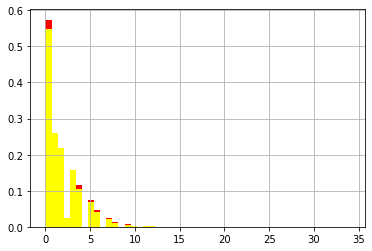

In [61]:
df22['mort_acc'].hist(color='red',bins=50,density=True)
df['mort_acc'].hist(color='yellow',bins=50,density=True)

<AxesSubplot:ylabel='Density'>

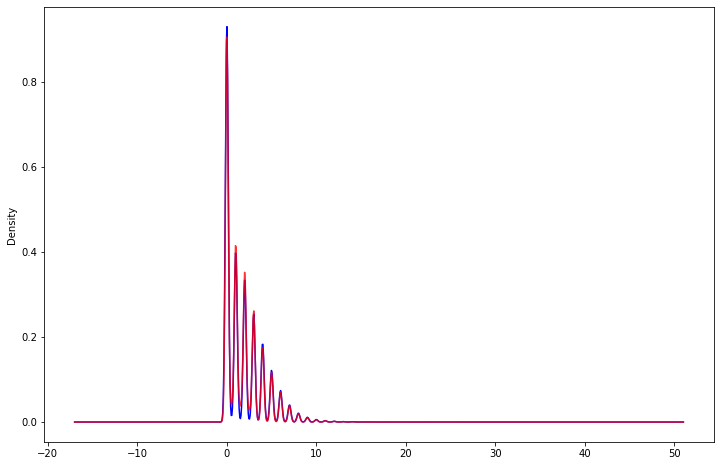

In [62]:
plt.figure(figsize=(12,8))
df22['mort_acc'].plot.density(color='blue')
df['mort_acc'].plot.density(color='red',alpha=0.8)

In [63]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_status1              0
dtype: int64

In [64]:
#DROP THE REMAINING NULL VALUES ROW WISE

In [65]:
df=df.dropna()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

#### Now we have to handle categorical data 

In [67]:
df['address'].nunique()

392898

In [68]:
df['application_type'].nunique()

3

In [69]:
df['initial_list_status'].nunique()

2

In [70]:
df['earliest_cr_line'].nunique()

684

In [71]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [72]:
df['term'].nunique()

2

In [73]:
df['purpose'].nunique()

14

In [74]:
df['term']

0          36 months
1          36 months
2          36 months
3          36 months
4          60 months
             ...    
396025     60 months
396026     36 months
396027     36 months
396028     60 months
396029     36 months
Name: term, Length: 395219, dtype: object

In [75]:
def put_val(term):
    if term==' 36 months': return 36
        
    elif term==' 60 months': return 60
    
#df['term']=df.apply(lambda x: put_val(x['term']),axis=1)
df['term']=df['term'].apply(put_val)

In [76]:
df['term'].nunique()

2

In [77]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [78]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [79]:
# COLUMN SUBGRADE AUTOMATICALLY CONTAINS GRADE SO WE DO NOT REQUIRE GRADE COLUMN SEPARETELY

In [80]:
df=df.drop('grade',axis=1)

In [81]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_status1'],
      dtype='object')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   sub_grade             395219 non-null  object 
 5   home_ownership        395219 non-null  object 
 6   annual_inc            395219 non-null  float64
 7   verification_status   395219 non-null  object 
 8   issue_d               395219 non-null  object 
 9   loan_status           395219 non-null  object 
 10  purpose               395219 non-null  object 
 11  dti                   395219 non-null  float64
 12  earliest_cr_line      395219 non-null  object 
 13  open_acc              395219 non-null  float64
 14  pub_rec               395219 non-null  float64
 15  

In [83]:
df['dti']

0         26.24
1         22.05
2         12.79
3          2.60
4         33.95
          ...  
396025    15.63
396026    21.45
396027    17.56
396028    15.88
396029     8.32
Name: dti, Length: 395219, dtype: float64

In [84]:
df['open_acc']

0         16.0
1         17.0
2         13.0
3          6.0
4         13.0
          ... 
396025     6.0
396026     6.0
396027    15.0
396028     9.0
396029     3.0
Name: open_acc, Length: 395219, dtype: float64

In [85]:
dummies=pd.get_dummies(df['sub_grade'],drop_first=True)
df=pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 57 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   home_ownership        395219 non-null  object 
 5   annual_inc            395219 non-null  float64
 6   verification_status   395219 non-null  object 
 7   issue_d               395219 non-null  object 
 8   loan_status           395219 non-null  object 
 9   purpose               395219 non-null  object 
 10  dti                   395219 non-null  float64
 11  earliest_cr_line      395219 non-null  object 
 12  open_acc              395219 non-null  float64
 13  pub_rec               395219 non-null  float64
 14  revol_bal             395219 non-null  float64
 15  

In [87]:
dummies=pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)
df=pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [88]:
df=df.drop('address',axis=1)

In [89]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 70 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   home_ownership                       395219 non-null  object 
 5   annual_inc                           395219 non-null  float64
 6   issue_d                              395219 non-null  object 
 7   loan_status                          395219 non-null  object 
 8   dti                                  395219 non-null  float64
 9   earliest_cr_line                     395219 non-null  object 
 10  open_acc                             395219 non-null  float64
 11  pub_rec      

In [90]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [91]:
# we will not create separate column for NONE and ANY

In [92]:
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [93]:
dummies=pd.get_dummies(df['home_ownership'],drop_first=True)
df=pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 72 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   issue_d                              395219 non-null  object 
 6   loan_status                          395219 non-null  object 
 7   dti                                  395219 non-null  float64
 8   earliest_cr_line                     395219 non-null  object 
 9   open_acc                             395219 non-null  float64
 10  pub_rec                              395219 non-null  float64
 11  revol_bal    

In [95]:
df['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 395219, dtype: object

In [96]:
df['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 395219, dtype: object

In [97]:
df=df.drop('issue_d',axis=1)

In [98]:
df

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,Jun-1990,16.0,0.0,...,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,Jul-2004,17.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,Aug-2007,13.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,Sep-2006,6.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,Mar-1999,13.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Fully Paid,15.63,Nov-2004,6.0,0.0,...,0,0,0,0,0,0,0,0,0,1
396026,21000.0,36,12.29,700.42,110000.0,Fully Paid,21.45,Feb-2006,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,56500.0,Fully Paid,17.56,Mar-1997,15.0,0.0,...,0,0,0,0,0,0,0,0,0,1
396028,21000.0,60,15.31,503.02,64000.0,Fully Paid,15.88,Nov-1990,9.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
df=df.drop('earliest_cr_line',axis=1)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 70 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   loan_status                          395219 non-null  object 
 6   dti                                  395219 non-null  float64
 7   open_acc                             395219 non-null  float64
 8   pub_rec                              395219 non-null  float64
 9   revol_bal                            395219 non-null  float64
 10  revol_util                           395219 non-null  float64
 11  total_acc    

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
df['loan_status1']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status1, Length: 395219, dtype: int64

In [103]:
df['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 395219, dtype: object

In [104]:
# SO LOAN STATUS AND LOAN LOAN STATUS1 ARE SAME SO WE CAN DROP ANY ONE OF THEM

In [105]:
df=df.drop('loan_status',axis=1)

In [106]:
X=df.drop('loan_status1',axis=1).values
y=df['loan_status1'].values

In [107]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=101)

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [109]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#### Now we will create our model

In [110]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [111]:
X_train.shape

(276653, 68)

In [112]:
model= Sequential()
model.add(Dense(68,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(34,activation="relu"))
model.add(Dropout(0.2))


model.add(Dense(17,activation="relu"))
model.add(Dropout(0.2))


model.add(Dense(8,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1,activation='softmax'))

model.compile(loss='binary_crossentropy',optimizer="adam")



In [113]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))

Epoch 1/25
1081/1081 [==============================] - 6s 5ms/step - loss: 0.4820 - val_loss: 0.4597
Epoch 2/25
1081/1081 [==============================] - 4s 4ms/step - loss: 0.4655 - val_loss: 0.4586
Epoch 3/25
1081/1081 [==============================] - 5s 4ms/step - loss: 0.4620 - val_loss: 0.4572
Epoch 4/25
1081/1081 [==============================] - 5s 4ms/step - loss: 0.4605 - val_loss: 0.4574
Epoch 5/25
1081/1081 [==============================] - 4s 4ms/step - loss: 0.4592 - val_loss: 0.4567
Epoch 6/25
1081/1081 [==============================] - 4s 4ms/step - loss: 0.4581 - val_loss: 0.4554
Epoch 7/25
1081/1081 [==============================] - 4s 4ms/step - loss: 0.4574 - val_loss: 0.4556
Epoch 8/25
1081/1081 [==============================] - 5s 4ms/step - loss: 0.4569 - val_loss: 0.4548
Epoch 9/25
1081/1081 [==============================] - 5s 4ms/step - loss: 0.4569 - val_loss: 0.4559
Epoch 10/25
1081/1081 [==============================] - 4s 4ms/step - loss: 0.456

In [114]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

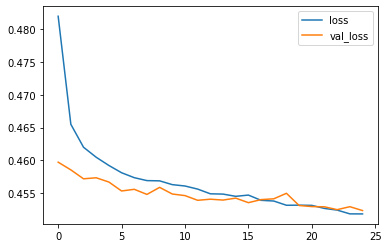

In [115]:
losses.plot()

In [116]:
from sklearn.metrics import classification_report,confusion_matrix
prediction=model.predict(X_test)

3706/3706 [==============================] - 5s 1ms/step


In [117]:
pred_train= model.predict(X_test)
scores = model.evaluate(X_test, y_test,verbose=2)
#print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
scores

3706/3706 [==============================] - 4s 1ms/step
3706/3706 - 6s - loss: 0.4524 - 6s/epoch - 2ms/step


0.4523739814758301

In [118]:
#predict_x=model.predict(X_test) 
#classes_x=np.argmax(predict_x,axis=-1)

In [119]:
classification_report(pred_train,y_test)


C:\Users\deven\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deven\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deven\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n         0.0       0.00      0.00      0.00         0\n         1.0       1.00      0.80      0.89    118566\n\n    accuracy                           0.80    118566\n   macro avg       0.50      0.40      0.45    118566\nweighted avg       1.00      0.80      0.89    118566\n'

In [120]:
from sklearn.metrics import accuracy_score,f1_score

In [123]:
accuracy = accuracy_score(y_test,pred_train)
print("Accuracy : ",accuracy)

Accuracy :  0.8029536292023008


In [124]:
f1 = f1_score(y_test,pred_train)
print("f1 Score : ",f1)

f1 Score :  0.8907091299486829
